In [2]:
# prompt: import drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/home/diego/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/tmp/ipykernel_268209/2803990346.py:120: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weigh

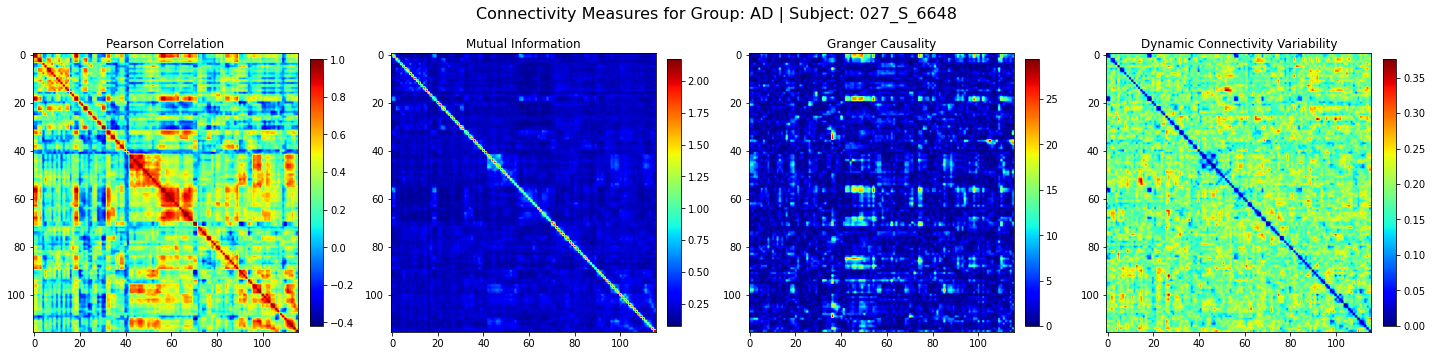

/tmp/ipykernel_268209/2803990346.py:130: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_tensor = torch.load(chosen_file)


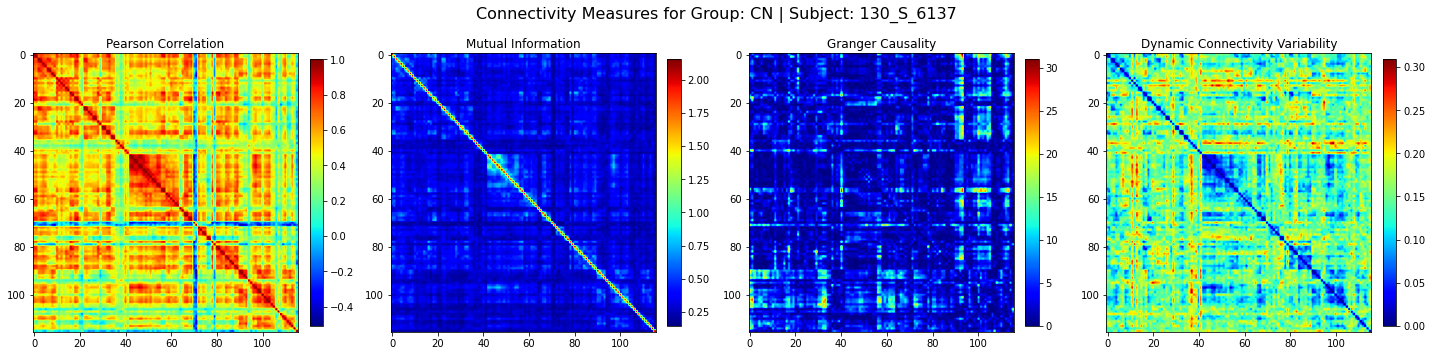

/tmp/ipykernel_268209/2803990346.py:140: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_tensor = torch.load(chosen_file)


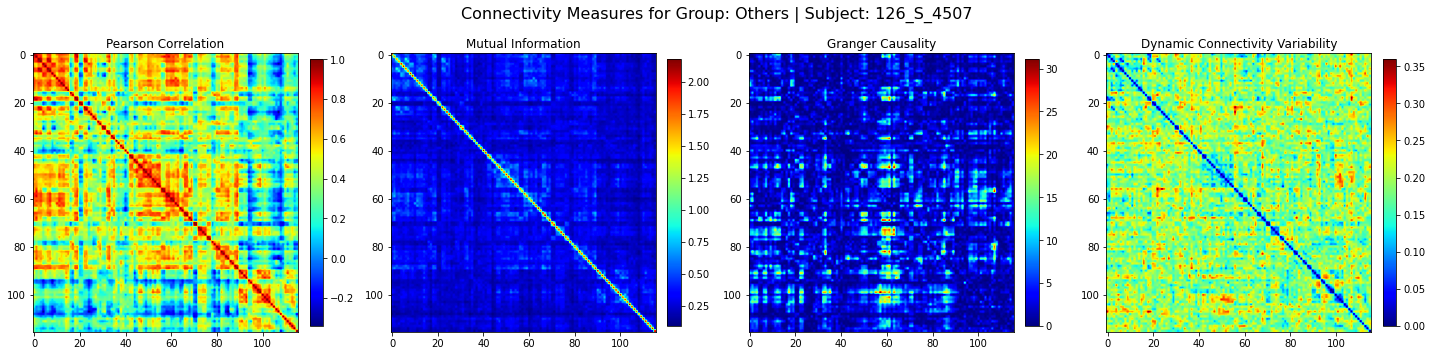

In [1]:
import os
import pandas as pd
import torch
import numpy as np
import scipy.io as sio
from tqdm import tqdm
import logging

# --- Project configuration ---
project_dir = '/home/diego/Escritorio/santiago/1st_paper/116ROIs'
os.chdir(project_dir)

# Load CSV file
csv_path = os.path.join(project_dir, 'DataBaseSubjects.csv')
subjects_df = pd.read_csv(csv_path)
import os
import random
import logging

import numpy as np
import pandas as pd
import scipy.io as sio
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- Project configuration ---
project_dir = '/home/diego/Escritorio/santiago/1st_paper/116ROIs'
os.chdir(project_dir)

# Load CSV file
csv_path = os.path.join(project_dir, 'DataBaseSubjects.csv')
subjects_df = pd.read_csv(csv_path)

# Directory for tensor storage
output_dir = os.path.join(project_dir, 'TensorData')
os.makedirs(output_dir, exist_ok=True)

# ---------------------------------------------------------------------
# Suppose you have a dictionary to store the paths of each subject's
# .pt tensor file by group. If you already have one, skip creating it.
# ---------------------------------------------------------------------
tensor_file_paths = {
    'AD': [],
    'CN': [],
    'Others': []
}

# ---------------------------------------------------------------------
# (Optional) Example code to fill 'tensor_file_paths' from the CSV
# only if you haven't done so already in a previous cell.
# ---------------------------------------------------------------------
for idx, row in subjects_df.iterrows():
    subject_id = row['SubjectID']
    research_group = row['ResearchGroup']
    
    # Determine group_label
    if research_group == 'AD':
        group_label = 'AD'
    elif research_group == 'CN':
        group_label = 'CN'
    else:
        group_label = 'Others'
    
    # Example path to the .pt tensor file:
    tensor_filename = f"{group_label}_tensor_{subject_id}.pt"
    tensor_fullpath = os.path.join(output_dir, tensor_filename)
    
    # Check if file exists, then add to the dictionary
    if os.path.exists(tensor_fullpath):
        tensor_file_paths[group_label].append(tensor_fullpath)


# ---------------------------------------------------------------------
# Define a plotting function to visualize the 4 matrices
# ---------------------------------------------------------------------
def plot_four_connectivity_matrices(tensor_4d, group_name, subject_id=None):
    """
    Given a (4, ROI, ROI) tensor, plots each matrix in its own subplot.
    The order is:
      0: Pearson Correlation
      1: Mutual Information
      2: Granger Causality
      3: Dynamic Connectivity Variability
    """
    titles = [
        "Pearson Correlation",
        "Mutual Information",
        "Granger Causality",
        "Dynamic Connectivity Variability"
    ]
    
    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    
    for i in range(4):
        im = axes[i].imshow(tensor_4d[i], aspect='auto', cmap='jet')
        axes[i].set_title(titles[i])
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    fig_title = f"Connectivity Measures for Group: {group_name}"
    if subject_id is not None:
        fig_title += f" | Subject: {subject_id}"
    fig.suptitle(fig_title, fontsize=16)
    
    plt.tight_layout()
    plt.show()

# ---------------------------------------------------------------------
# Choose ONE random subject from each group (AD, CN, Others)
# and plot the 4 connectivity matrices for each.
# ---------------------------------------------------------------------

# 1) AD group
if tensor_file_paths['AD']:
    chosen_file = random.choice(tensor_file_paths['AD'])
    # Extract subject ID from filename if needed
    # e.g., "AD_tensor_12345.pt" -> subject_id = 12345
    subject_id = os.path.basename(chosen_file).replace('AD_tensor_','').replace('.pt','')
    
    loaded_tensor = torch.load(chosen_file)  # shape => (4, ROI, ROI)
    plot_four_connectivity_matrices(loaded_tensor, 'AD', subject_id)
else:
    print("⚠️ No AD subjects found.")

# 2) CN group
if tensor_file_paths['CN']:
    chosen_file = random.choice(tensor_file_paths['CN'])
    subject_id = os.path.basename(chosen_file).replace('CN_tensor_','').replace('.pt','')
    
    loaded_tensor = torch.load(chosen_file)
    plot_four_connectivity_matrices(loaded_tensor, 'CN', subject_id)
else:
    print("⚠️ No CN subjects found.")

# 3) Others group
if tensor_file_paths['Others']:
    chosen_file = random.choice(tensor_file_paths['Others'])
    subject_id = os.path.basename(chosen_file).replace('Others_tensor_','').replace('.pt','')
    
    loaded_tensor = torch.load(chosen_file)
    plot_four_connectivity_matrices(loaded_tensor, 'Others', subject_id)
else:
    print("⚠️ No subjects found in the 'Others' category.")





/tmp/ipykernel_268209/2350861538.py:47: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_tensor = torch.load(chosen_file)


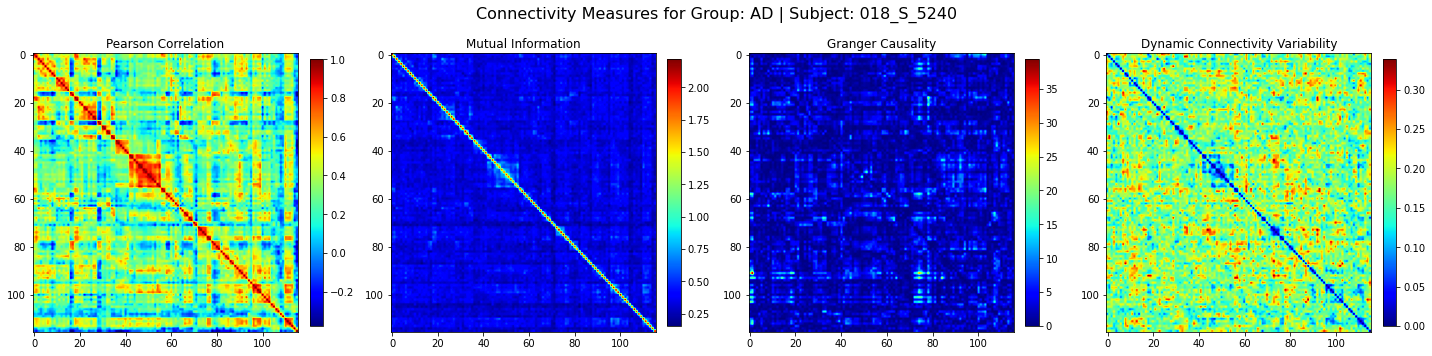

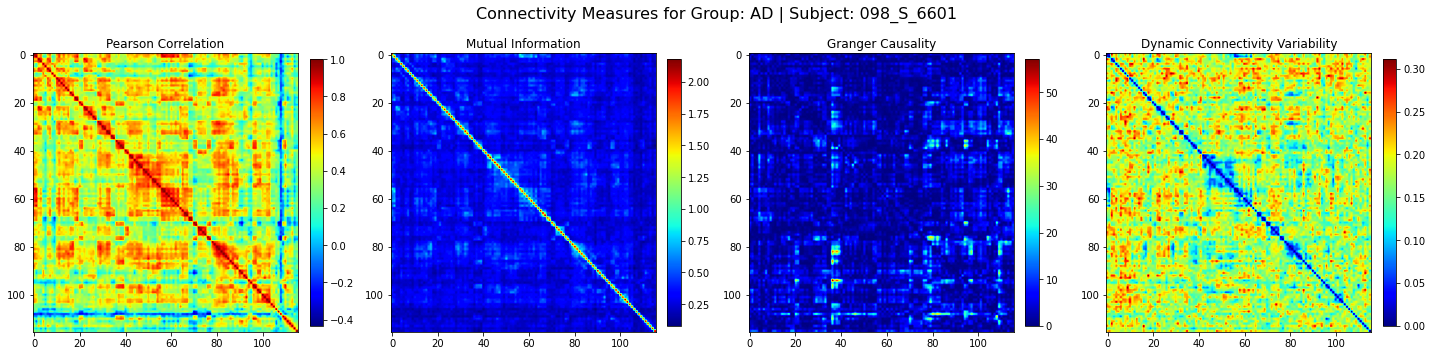

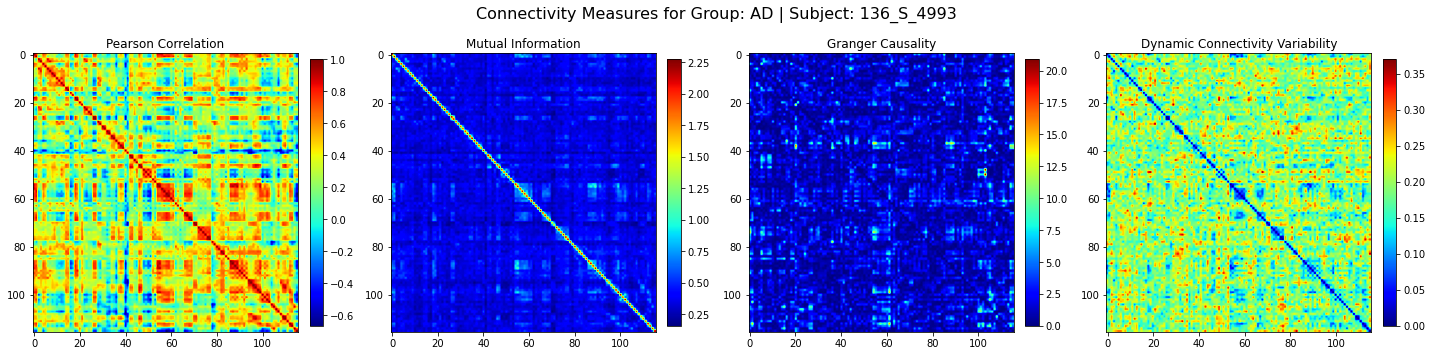

/tmp/ipykernel_268209/2350861538.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_tensor = torch.load(chosen_file)


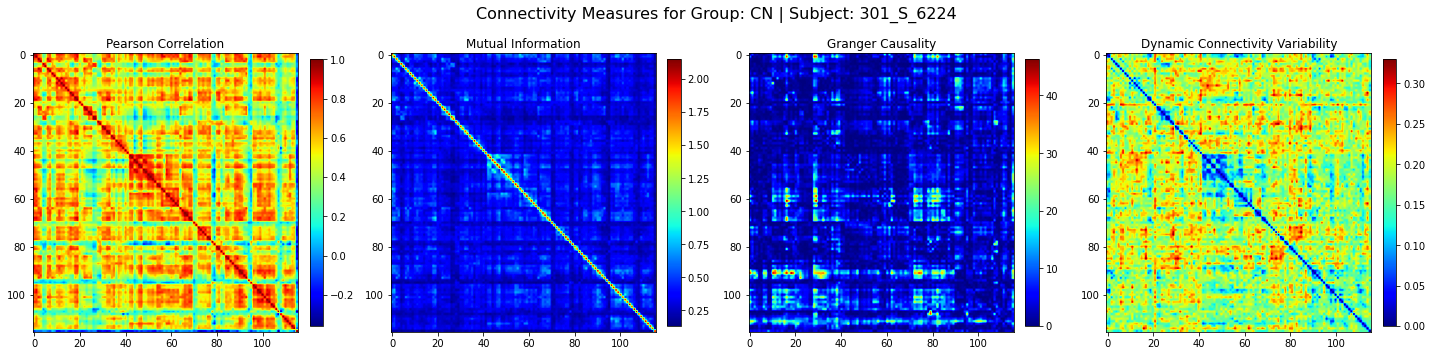

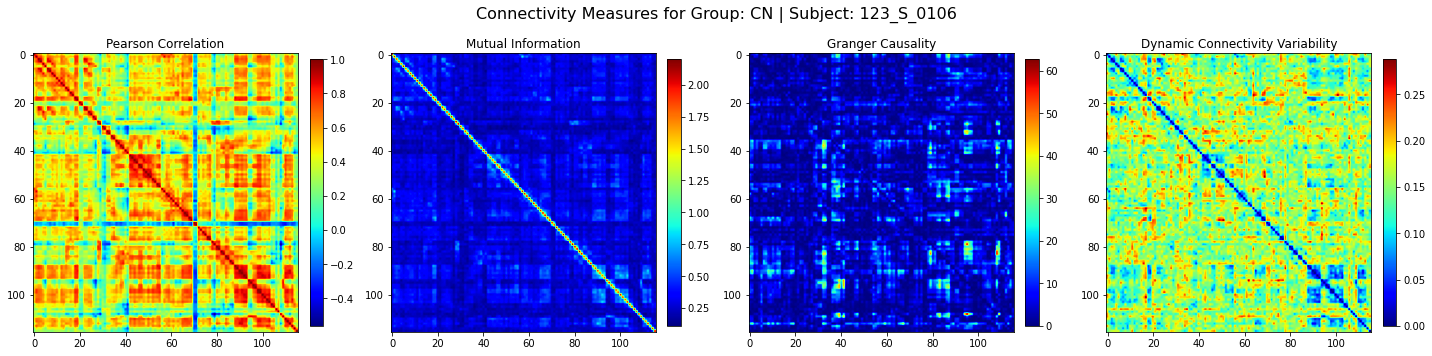

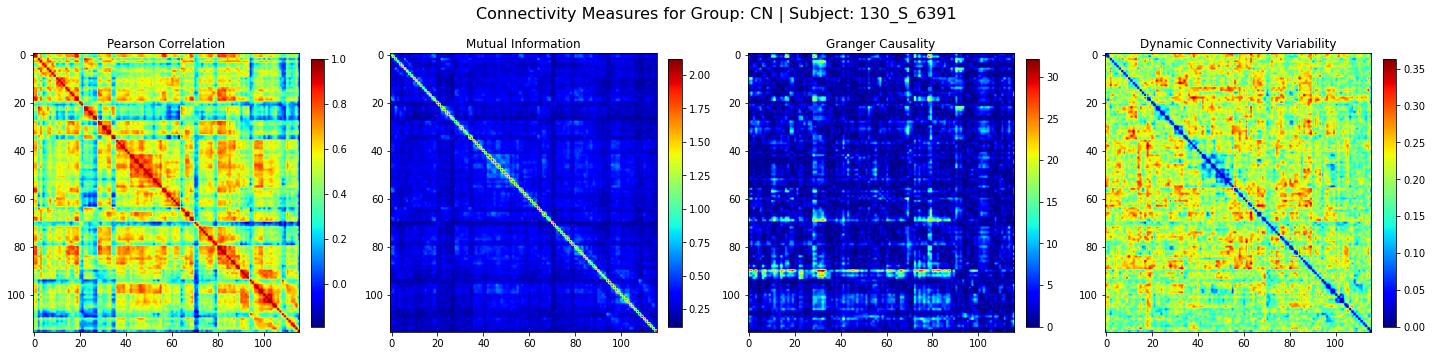

/tmp/ipykernel_268209/2350861538.py:71: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_tensor = torch.load(chosen_file)


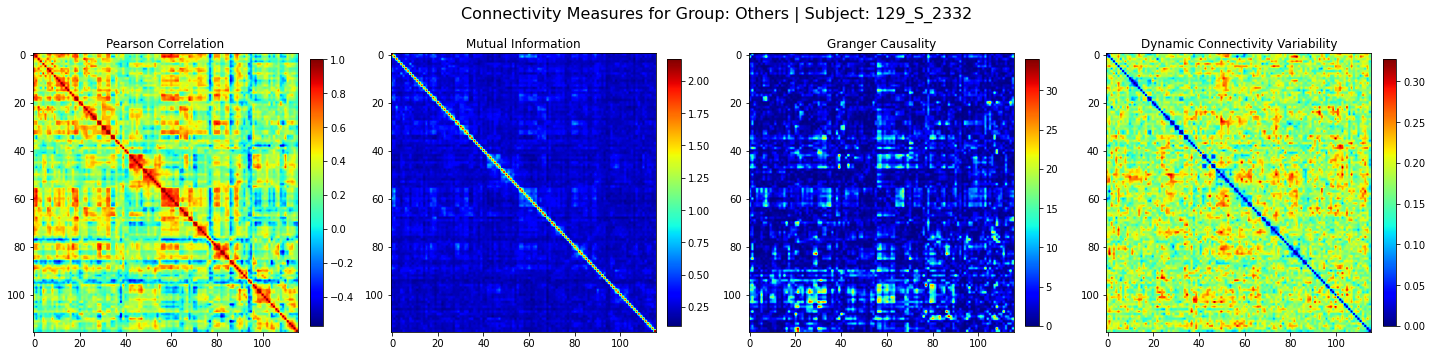

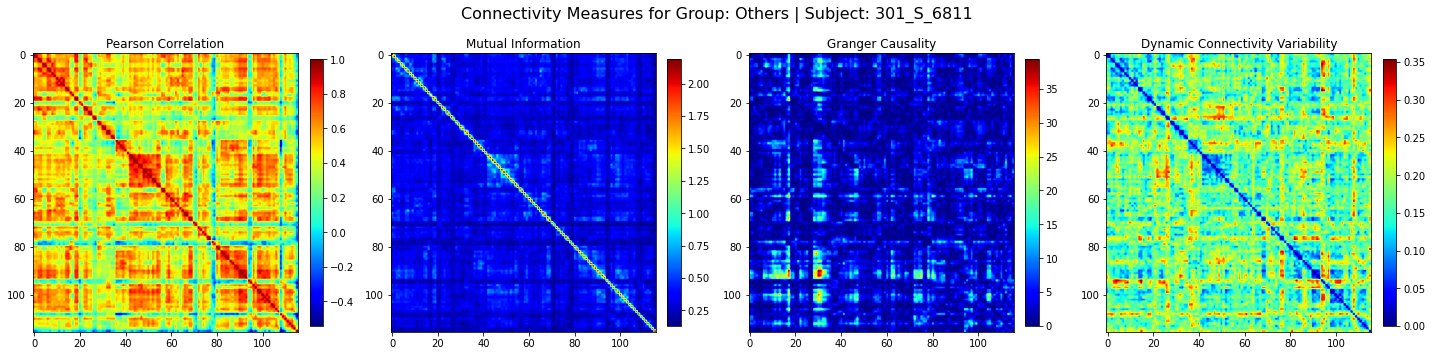

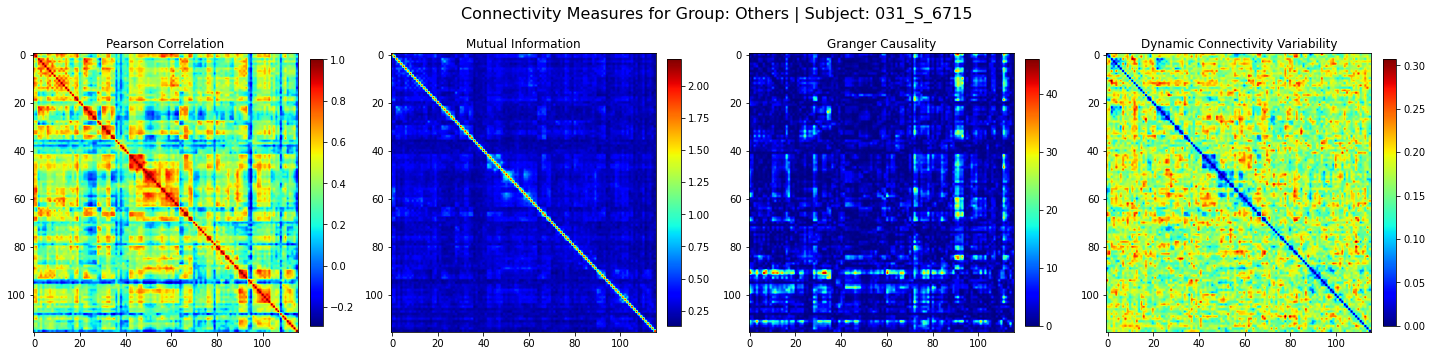

In [2]:
import random
import matplotlib.pyplot as plt
import torch
import os

def plot_four_connectivity_matrices(tensor_4d, group_name, subject_id=None):
    """
    Given a (4, ROI, ROI) tensor, plots each matrix in its own subplot.
    The order is:
      0: Pearson Correlation
      1: Mutual Information
      2: Granger Causality
      3: Dynamic Connectivity Variability
    """
    titles = [
        "Pearson Correlation",
        "Mutual Information",
        "Granger Causality",
        "Dynamic Connectivity Variability"
    ]

    fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
    for i in range(4):
        im = axes[i].imshow(tensor_4d[i], aspect='auto', cmap='jet')
        axes[i].set_title(titles[i])
        plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

    fig_title = f"Connectivity Measures for Group: {group_name}"
    if subject_id:
        fig_title += f" | Subject: {subject_id}"
    fig.suptitle(fig_title, fontsize=16)
    plt.tight_layout()
    plt.show()

# ----------------------------
# Plot up to 3 random subjects for each group
# ----------------------------
n_subjects_to_plot = 3

# 1) AD group
if tensor_file_paths['AD']:
    n_plots = min(n_subjects_to_plot, len(tensor_file_paths['AD']))
    chosen_files = random.sample(tensor_file_paths['AD'], n_plots)
    
    for chosen_file in chosen_files:
        subject_id = os.path.basename(chosen_file).replace('AD_tensor_','').replace('.pt','')
        loaded_tensor = torch.load(chosen_file)
        plot_four_connectivity_matrices(loaded_tensor, 'AD', subject_id)
else:
    print("⚠️ No AD subjects found.")

# 2) CN group
if tensor_file_paths['CN']:
    n_plots = min(n_subjects_to_plot, len(tensor_file_paths['CN']))
    chosen_files = random.sample(tensor_file_paths['CN'], n_plots)
    
    for chosen_file in chosen_files:
        subject_id = os.path.basename(chosen_file).replace('CN_tensor_','').replace('.pt','')
        loaded_tensor = torch.load(chosen_file)
        plot_four_connectivity_matrices(loaded_tensor, 'CN', subject_id)
else:
    print("⚠️ No CN subjects found.")

# 3) Others group
if tensor_file_paths['Others']:
    n_plots = min(n_subjects_to_plot, len(tensor_file_paths['Others']))
    chosen_files = random.sample(tensor_file_paths['Others'], n_plots)
    
    for chosen_file in chosen_files:
        subject_id = os.path.basename(chosen_file).replace('Others_tensor_','').replace('.pt','')
        loaded_tensor = torch.load(chosen_file)
        plot_four_connectivity_matrices(loaded_tensor, 'Others', subject_id)
else:
    print("⚠️ No subjects found in the 'Others' category.")